# 🫀 Exploratory Data Analysis: Heart Diesease Patient Records

Welcome to this EDA project focused on medical data from heart disease patients.
The goal of this notebook is to explore various patient attricutes - such as age, cholestorial, blood pressure, and ECG results - to identify potential patterns and correlations related to the presence of heart disease.

## 🔎 Questions Explored:

- What is the age and gender distribution among patients?
- How does chest pain type relate to heart disease diagnosis?
- What trends can be observed in cholesterol and resting blood pressure levels?
- Are certain ECG type or maximum heart rates more common in affected patients?
- Do combinations of multiple risk factors reveal clear distinctions?

💬 **Note:** This project was developed as part of my Data Analysis traning and is intended for educational and demonstrative purposes only.

### Preparation

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Loading the dataset
url = "https://gist.githubusercontent.com/trantuyen082001/1fc2f5c0ad1507f40e721e6d18b34138/raw/56c3ca73768ceb74cdf6aa20ee7314c47d6ae08e/heart.csv"
df = pd.read_csv(url, usecols=['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'])

### 📊 EDA

Q1: What is the age distribution in the dataset?

In [15]:
#Distribution of age
df.describe().age

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

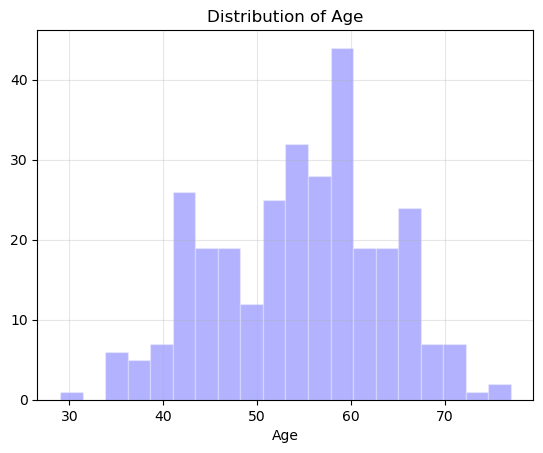

In [39]:
#Visualizing with plot
plt.hist(df.age, bins=20, color='blue', alpha=0.3, edgecolor='white')
plt.title('Distribution of Age')
plt.grid(True, alpha=0.3)
plt.xlabel('Age')
plt.show()

The average patient age lies at 54 years.
The highest age to be found is 77 years, while the youngest patient is of age 29.

Q2: What is the sex distribution in the dataset?

In [41]:
#Distribution of male and female patients
df.groupby(['sex']).sex.count()

sex
0     96
1    207
Name: sex, dtype: int64

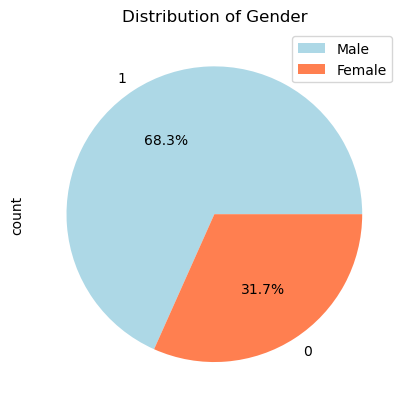

In [65]:
#Visualizing with piechart
df.sex.value_counts().plot(kind='pie', autopct='%1.1f%%', colors = ['lightblue', 'coral'])
plt.title('Distribution of Gender')
plt.legend(['Male', 'Female'])
plt.show()

Q3: How to types of chest pain (CP) distribute among patients and sex?

In [48]:
#Distribution of chest pain types
df.groupby(['cp']).cp.count()

cp
0    143
1     50
2     87
3     23
Name: cp, dtype: int64

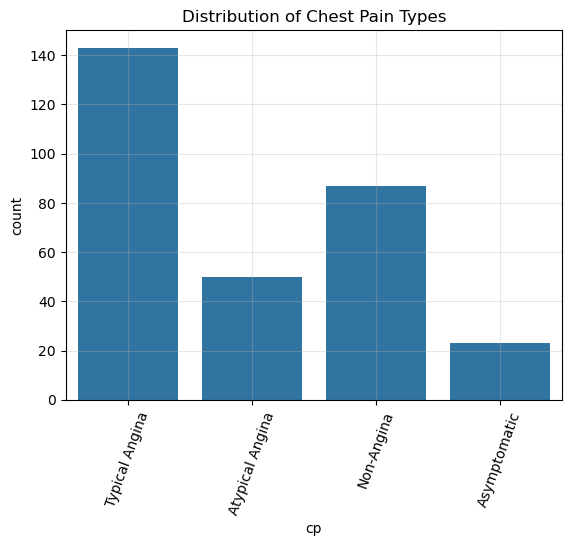

In [13]:
#Visualizing with barplot
sns.countplot(x=df.cp)
plt.title('Distribution of Chest Pain Types')
plt.grid(True, alpha=0.3)
plt.xticks([0,1,2,3],['Typical Angina','Atypical Angina','Non-Angina','Asymptomatic'],rotation=70)
plt.show()

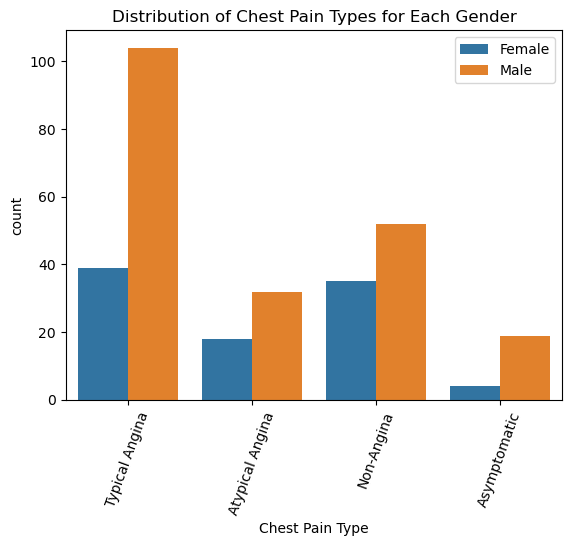

In [79]:
#Distribution by gender
sns.countplot(x='cp', hue='sex', data=df)
plt.title('Distribution of Chest Pain Types for Each Gender')
plt.xlabel('Chest Pain Type')
plt.xticks([0,1,2,3],['Typical Angina','Atypical Angina','Non-Angina','Asymptomatic'],rotation=70)
plt.legend(['Female','Male'])
plt.show()

Q4: How does the resting blood pressure (trtps) vary by age?

In [93]:
#Distribution of trtps depending on age
#Clustering age in groups
def age_group(row):
    if row.age >= 20 and row.age < 30:
        return '20s'
    elif 30 <= row.age < 40:
        return '30s'
    elif 40 <= row.age < 50:
        return '40s'
    elif 50 <= row.age < 60:
        return '50s'
    elif 60 <= row.age < 70:
        return '60s'
    elif 70 <= row.age < 80:
        return '70s'

df['age_group'] = df.apply(age_group, axis=1)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,age_group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,60s
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,30s
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,40s
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,50s
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,50s


In [105]:
bp_by_age = df.groupby(by='age_group').trtbps.mean()
bp_by_age

age_group
20s    130.000000
30s    125.200000
40s    123.916667
50s    133.472000
60s    136.375000
70s    135.800000
Name: trtbps, dtype: float64

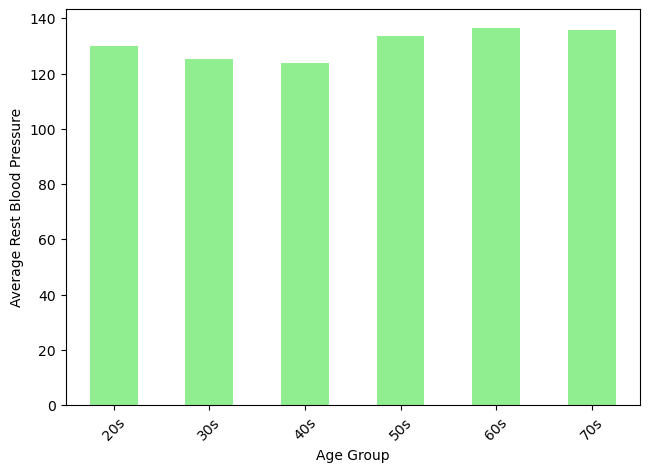

In [121]:
#Visualizing with barchart
bp_by_age.plot(kind='bar', color='lightgreen')
plt.tight_layout()
plt.xlabel('Age Group')
plt.ylabel('Average Rest Blood Pressure')
plt.xticks(rotation=45)
plt.show()

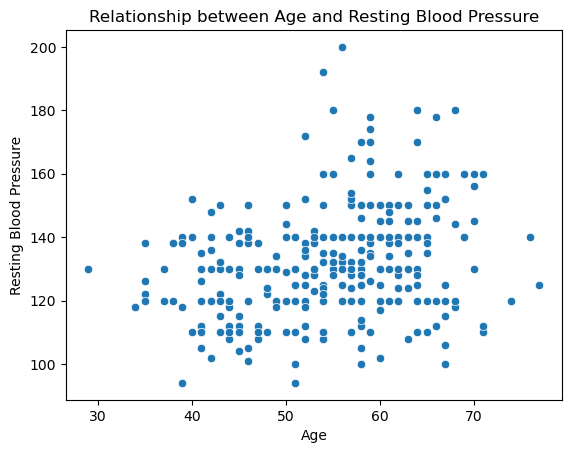

In [18]:
sns.scatterplot(x='age', y='trtbps', data=df)
plt.title('Relationship between Age and Resting Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.show()

The average resting blood pressure among the patients is tentatively increasing at the age of 50.

Q5: How does cholesterol (chol) correlate with the max. heart frequency (thalachh)?

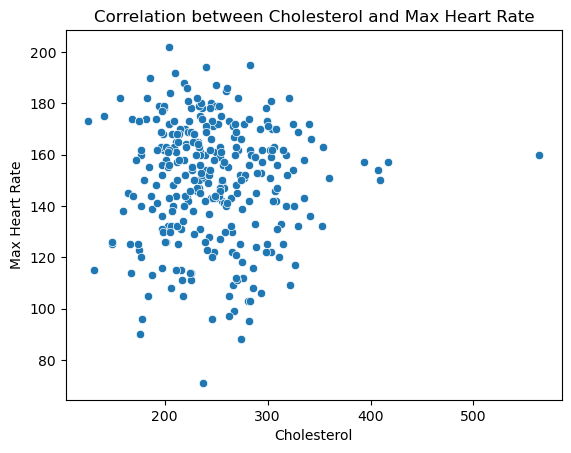

In [23]:
sns.scatterplot(x='chol', y='thalachh', data=df)
plt.title('Correlation between Cholesterol and Max Heart Rate')
plt.xlabel('Cholesterol')
plt.ylabel('Max Heart Rate')
plt.show()

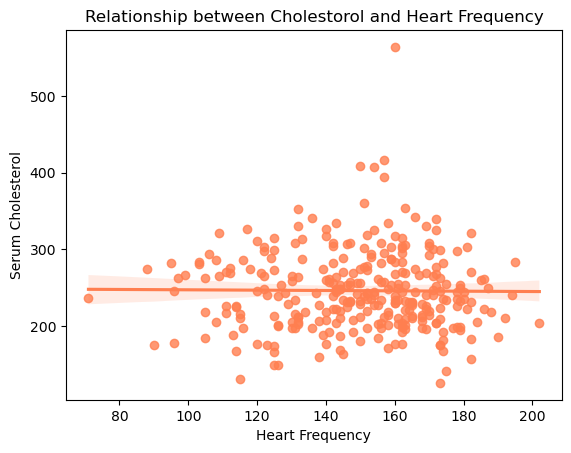

In [129]:
#Correlation between cholesterol and heart frequency 
sns.regplot(x='thalachh', y='chol', data=df, color = 'coral')
plt.title('Relationship between Cholestorol and Heart Frequency')
plt.xlabel('Heart Frequency')
plt.ylabel('Serum Cholesterol')
plt.show()

In [131]:
correlation = df['chol'].corr(df['thalachh'])
print(f"Correlation between Cholesterol and Heart Frequency: {correlation:.2f}")

Correlation between Cholesterol and Heart Frequency: -0.01


The dataset does not deliver a statistical correlation between cholesterol and heart frequency (corr = -0.01)

Q6: How does fasting blood sugar (fbs) correlate with heart disease (output)?

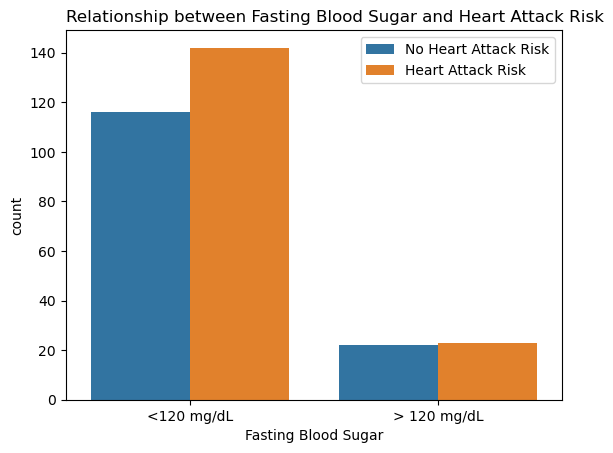

In [155]:
#Relationship fasting blood sugar and output (0:low, 1:High)
sns.countplot(x='fbs', hue='output',data=df)
plt.title('Relationship between Fasting Blood Sugar and Heart Attack Risk', loc='left')
plt.xlabel('Fasting Blood Sugar')
plt.xticks([0,1], ['<120 mg/dL', '> 120 mg/dL'])
plt.legend(['No Heart Attack Risk', 'Heart Attack Risk'])
plt.show()

No clear corelation to be observed. 
A Chi-Square test could deliver further insights.

Q7: Whats the distribution of different types of rest ecg?

In [163]:
#Distribution of restecg
restecg_df = df.groupby(['restecg']).restecg.count().to_frame(name=None)
restecg_df

,None
restecg,
0,147
1,152
2,4


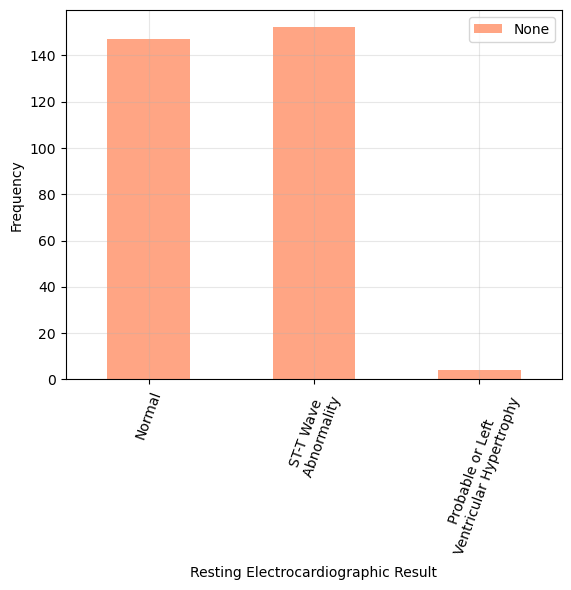

In [203]:
restecg_df.plot(kind='bar', color = 'coral', alpha=0.7)
plt.grid(True, alpha=0.3)
plt.xticks([0,1,2], ['Normal','ST-T Wave\n Abnormality','Probable or Left\n Ventricular Hypertrophy'], rotation=70)
plt.xlabel('Resting Electrocardiographic Result')
plt.ylabel('Frequency')
plt.show()

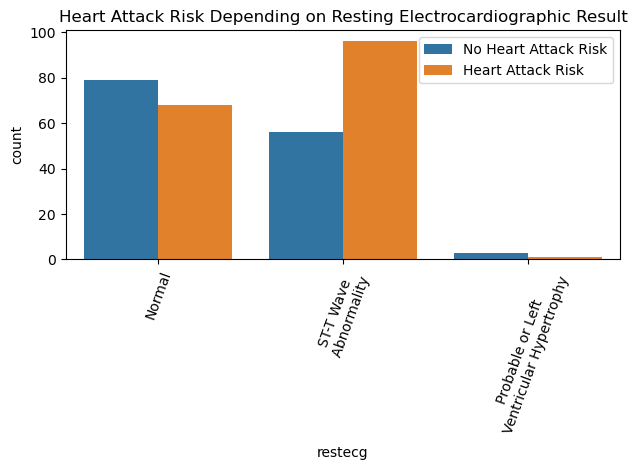

In [225]:
#Alternative mit countplot um Beziehung mit output Variable zu prüfen
sns.countplot(x='restecg',hue='output', data=df)
plt.title('Heart Attack Risk Depending on Resting Electrocardiographic Result')
plt.xticks([0,1,2], ['Normal','ST-T Wave\n Abnormality','Probable or Left\n Ventricular Hypertrophy'], rotation=70)
plt.legend(['No Heart Attack Risk','Heart Attack Risk'])
plt.tight_layout()
plt.show()

Q8: How does the caa correlate with the presence of heart disease? 

In [231]:
#Relationship between caa and output
caa_df = df.groupby(['caa']).output.count().to_frame(name=None)
caa_df

,None
caa,
0,175
1,65
2,38
3,20
4,5


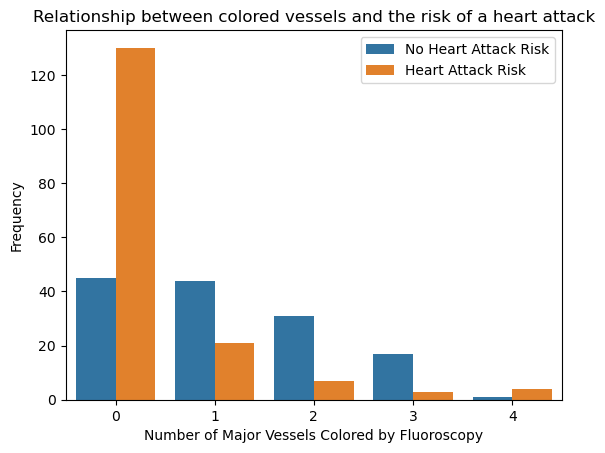

In [237]:
sns.countplot(x='caa', hue='output', data=df)
plt.title('Relationship between colored vessels and the risk of a heart attack')
plt.xlabel('Number of Major Vessels Colored by Fluoroscopy')
plt.ylabel('Frequency')
plt.legend(['No Heart Attack Risk','Heart Attack Risk'])
plt.show()

The bar plot shows a clear connection between the two variables. 
The danger of a heart attack decreases with the number of caa.

Q9: How do thalassemia types distribute?

In [243]:
#Distribution of thalassemia types
thal_types = df.groupby(['thall']).thall.count().to_frame(name=None)
thal_types

,None
thall,
0,2
1,18
2,166
3,117


In [253]:
#Issue with thal[0] -> delete
df.drop(df.index[df.thall==0],inplace=True)
thal_types

,None
thall,
0,2
1,18
2,166
3,117


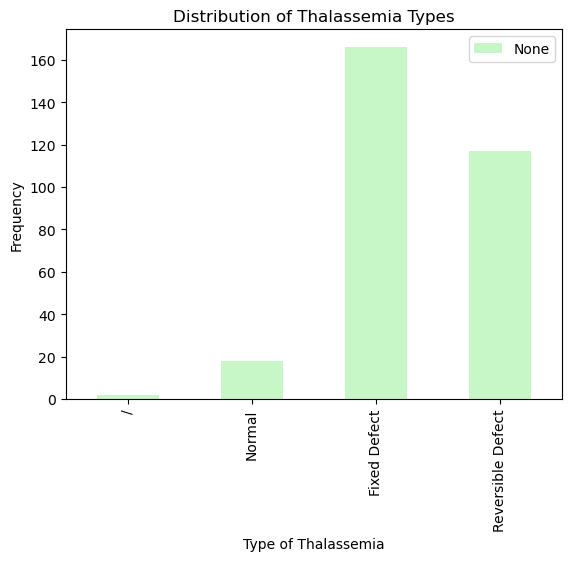

In [259]:
thal_types.plot(kind='bar', color='lightgreen',alpha=0.5)
plt.title('Distribution of Thalassemia Types')
plt.xlabel('Type of Thalassemia')
plt.ylabel('Frequency')
plt.xticks([0,1,2,3],['/','Normal','Fixed Defect','Reversible Defect'])
plt.show()

Over 160 patients suffer a fixed defect thalassemia 

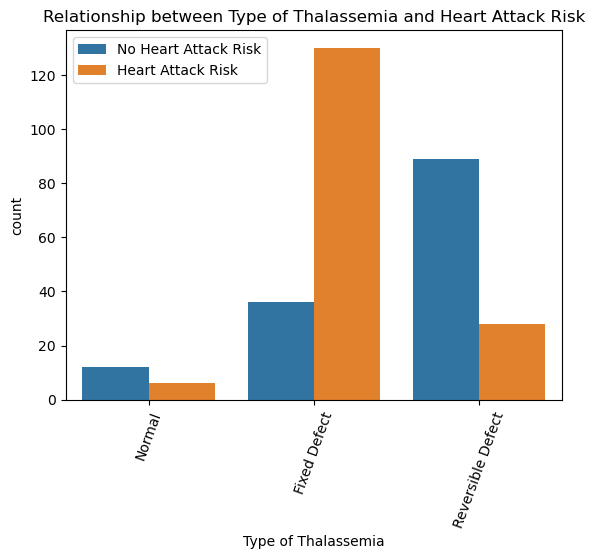

In [273]:
#Extra: Relationship with output
sns.countplot(x='thall',hue='output',data=df)
plt.title('Relationship between Type of Thalassemia and Heart Attack Risk')
plt.xlabel('Type of Thalassemia')
plt.xticks([0,1,2], ['Normal','Fixed Defect','Reversible Defect'], rotation=70)
plt.legend(['No Heart Attack Risk','Heart Attack Risk'])
plt.show()

Q10: How does age influence the maximal heart frequency among the patients?

In [277]:
#Relationship between age and maximal heart frequency 
age_thalachh_df = df.groupby(['age_group']).thalachh.mean()
age_thalachh_df                             

age_group
20s    202.000000
30s    169.733333
40s    159.291667
50s    148.227642
60s    141.475000
70s    130.500000
Name: thalachh, dtype: float64

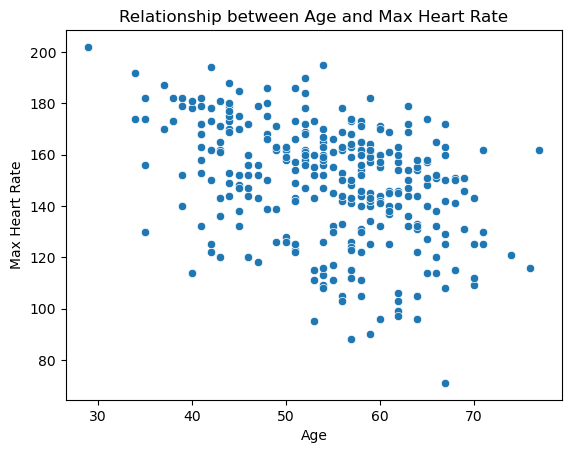

In [36]:
sns.scatterplot(x='age', y='thalachh', data=df)
plt.title('Relationship between Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.show()

Q11: How does exercise induced angina correlate with heart disease?

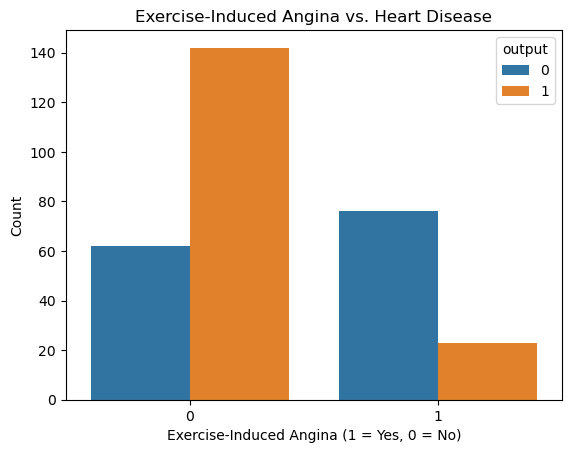

In [39]:
sns.countplot(x='exng', hue='output', data=df)
plt.title('Exercise-Induced Angina vs. Heart Disease')
plt.xlabel('Exercise-Induced Angina (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

Q12: How does the variable ST depression induced by exercise relate to the old peak?

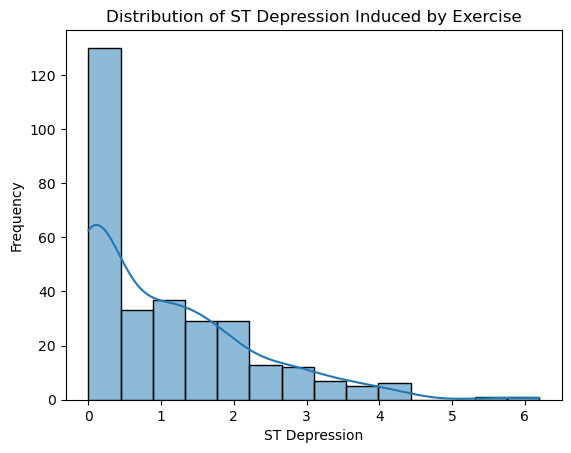

In [43]:
sns.histplot(df['oldpeak'], kde=True)
plt.title('Distribution of ST Depression Induced by Exercise')
plt.xlabel('ST Depression')
plt.ylabel('Frequency')
plt.show()

Oldpeak is a measure for the ST decrease in mm.
A higher value implies a stronger reduction, which can be a sign for heart disease.

Q13: What is the distribution of slope of peak exercise of the ST segment?

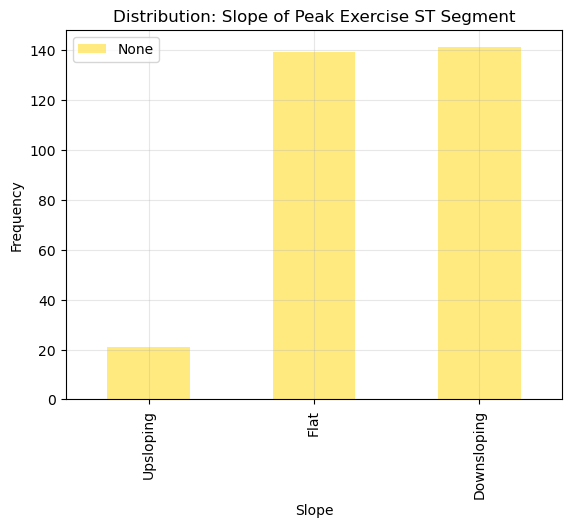

In [308]:
slp_df.plot(kind='bar', color='gold', alpha=0.5)
plt.title('Distribution: Slope of Peak Exercise ST Segment')
plt.xlabel('Slope')
plt.ylabel('Frequency')
plt.grid(True,alpha=0.3)
plt.xticks([0,1,2],['Upsloping','Flat','Downsloping'])
plt.show()

The majority of the patients shows a flat oder downsloping curve, which could be in indication for heart disease.

Q14: How does the thall variable relate to the presence of heart disease?

In [324]:
#Relationship thalassemia type and high/low risk of a heart attack
thall_type_risk_df = df.groupby(['thall']).output.count().to_frame(name=None)
thall_type_risk_df

,None
thall,
1,18
2,166
3,117


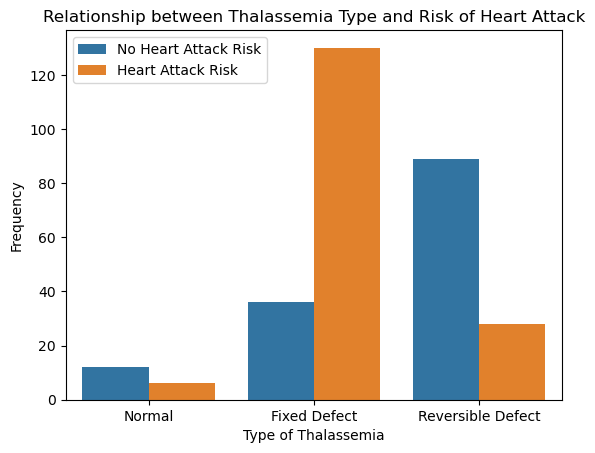

In [335]:
sns.countplot(x=df.thall, hue='output', data=df)
plt.title('Relationship between Thalassemia Type and Risk of Heart Attack')
plt.xlabel('Type of Thalassemia')
plt.ylabel('Frequency')
plt.xticks([0,1,2],['Normal','Fixed Defect','Reversible Defect'])
plt.legend(['No Heart Attack Risk','Heart Attack Risk'])
plt.show()

Patients with a "fixed defect" type of Thalassemia have the highest risk of heart disease.

Q15: What is the overall distribution of heart disease?

In [348]:
#Distribution of heart attack risk
heart_attack_df = df.groupby(['output']).output.count().to_frame(name=None)
heart_attack_df

,None
output,
0,137
1,164


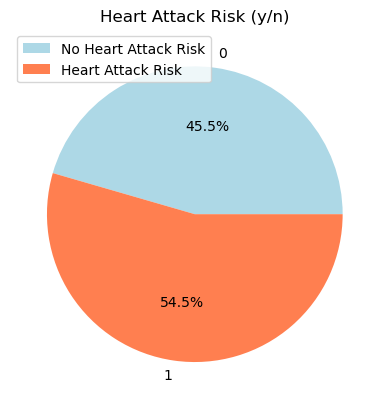

In [362]:
heart_attack_df.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue','coral'], subplots=True)
plt.title('Heart Attack Risk (y/n)')
plt.legend(['No Heart Attack Risk','Heart Attack Risk'])
plt.show()